In [1]:
import tensorflow as tf
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
filename = 'C:/Users/USX28939/PYTHON_CODE_BASE/GitHub_Doc/stanford-tensorflow-tutorials/examples/data/birth_life_2010.txt'

text = open(filename, 'r').readlines()[1:]
data = [line[:-1].split('\t') for line in text]
births = [float(line[1]) for line in data]
lifes = [float(line[2]) for line in data]
data = list(zip(births, lifes))
n_samples = len(data)
data = np.asarray(data, dtype=np.float32)

In [3]:
tf.reset_default_graph() 

In [4]:
X = tf.placeholder(dtype = tf.float32, shape = None, name = "birth_rate")
Y = tf.placeholder(dtype = tf.float32, shape = None, name = "life_expectancy")

In [5]:
print(X,Y)

Tensor("birth_rate:0", dtype=float32) Tensor("life_expectancy:0", dtype=float32)


In [6]:
# tf.get_variable , it checks if the variable is already created or not if not, create a new variable
W = tf.get_variable(name = "Weights",initializer = 0.0,shape = None,dtype = tf.float32)
B = tf.get_variable(name = "Bias",initializer = 0.0, shape = None,dtype = tf.float32)
print(W,B)

<tf.Variable 'Weights:0' shape=() dtype=float32_ref> <tf.Variable 'Bias:0' shape=() dtype=float32_ref>


In [7]:
Y_Predicted = X*W + B

In [8]:
loss = tf.square(Y - Y_Predicted, name='loss')
print(loss)

Tensor("loss:0", dtype=float32)


In [12]:
optimizer  = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss_h)
print(optimizer)

name: "GradientDescent"
op: "NoOp"
input: "^GradientDescent/update_Weights/ApplyGradientDescent"
input: "^GradientDescent/update_Bias/ApplyGradientDescent"



In [13]:
start = time.time()

In [14]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    writer = tf.summary.FileWriter("C:/Users/USX28939/PYTHON_CODE_BASE/graphs",sess.graph)
    for i in range(250):
        total_loss = 0
        for x, y in data:
            
            _,l = sess.run([optimizer, loss_h], feed_dict = {X:x,Y:y})
            total_loss += l

        print('Epoch {0}: {1}'.format(i, total_loss/n_samples))
    
    writer.close()
    w_value , b_value = sess.run([W,B])

Epoch 0: 712.5349932218853
Epoch 1: 480.1768338768106
Epoch 2: 411.27837095009653
Epoch 3: 381.143803016763
Epoch 4: 363.96519568942387
Epoch 5: 352.0028216342001
Epoch 6: 342.65910039112754
Epoch 7: 334.84100784196664
Epoch 8: 327.9518736341282
Epoch 9: 321.63482000235666
Epoch 10: 315.6941960449968
Epoch 11: 310.0039571509844
Epoch 12: 304.4644903231608
Epoch 13: 299.0284345306064
Epoch 14: 293.6694770147926
Epoch 15: 288.3639233997778
Epoch 16: 283.0933333819634
Epoch 17: 277.85644171355585
Epoch 18: 272.6439291345446
Epoch 19: 267.44677355952166
Epoch 20: 262.2604390375855
Epoch 21: 257.0869516860634
Epoch 22: 251.93409620844758
Epoch 23: 246.7978311511443
Epoch 24: 241.68042829000441
Epoch 25: 236.58249802497158
Epoch 26: 231.50381602431207
Epoch 27: 226.4469073355737
Epoch 28: 221.41355832310785
Epoch 29: 216.40122747868298
Epoch 30: 211.41857506291646
Epoch 31: 206.4636872577824
Epoch 32: 201.5256608824981
Epoch 33: 196.60663773480215
Epoch 34: 191.69949661995236
Epoch 35: 186.8

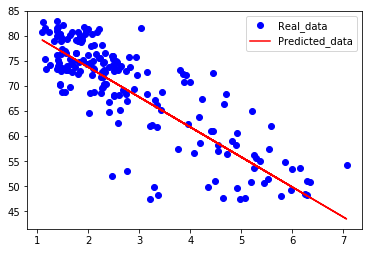

In [15]:
X_X,Y_Y = data.T[0], data.T[1]
plt.plot(X_X,Y_Y, "bo",label = "Real_data")
plt.plot(X_X,X_X*w_value + b_value, "r",label = "Predicted_data")
plt.legend()
plt.show()

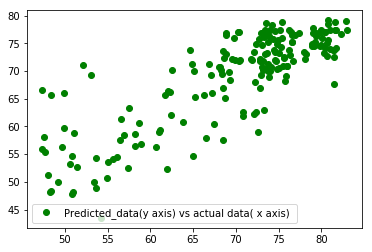

In [14]:
X_X,Y_Y = data.T[0], data.T[1]
#plt.plot(X_X,Y_Y, "bo",label = "Real_data")
y_pre =  X_X*w_value + b_value
plt.plot(Y_Y,y_pre, "go",label = "Predicted_data(y axis) vs actual data( x axis) ")
plt.legend()
plt.show()

# Huber Loss

This is used if there are outliers in the data which makes the overall square error value too large.
If the difference between the predicted value and the real value is smaller than a delta value, square it
If it’s large, take its absolute value


In [10]:
def huber_loss(labels, predictions, delta=14.0):
    residual = tf.abs(labels - predictions, name = "Residual")
    def f1(): return 0.5 * tf.square(residual)
    def f2(): return delta * residual - 0.5 * tf.square(delta)
    return tf.cond(residual < delta, f1, f2)

In [11]:
loss_h = huber_loss(Y,Y_Predicted)